In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from collections import deque
import random
import tensorflow as tf

env = gym.make("CartPole-v1")
state = env.reset()

In [ ]:
model = Sequential()
model.add(Dense(units = 50, input_dim=4, activation='relu'))
model.add(Dense(units = 50, activation = "relu"))
model.add(Dense(units = 2, activation = "linear"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#opt = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='MSE',optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,902
Trainable params: 2,902
Non-trainable params: 0
_________________________________________________________________


------------------------------------

In [13]:
train_episodes = 200
epsilon = 1
gamma = 0.99
max_steps = 150
state = env.reset()

In [14]:
Loss = []
Rewards = []

for e in range(1, train_episodes+1):
  epsilon = epsilon - (1/train_episodes)
  total_reward = 0
  t = 0

  state = env.reset()
  state = np.reshape(state, [1, 4])  
  
  done = False
  while t < max_steps and done == False:

    Qs = model.predict(state)[0]

    if np.random.rand()<epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Qs)

    next_state, reward, done, _ = env.step(action)
    next_state = np.reshape(next_state, [1, 4])

    total_reward += reward

   
    if done:
      y = reward
    else:
      y = reward + gamma*np.max(model.predict(next_state)[0])
    
    Q_target = model.predict(state)
    Q_target[0][action] = y
          
    h = model.fit(state,Q_target,epochs=1,verbose=0)

    loss = h.history['loss'][0]
    
    state = next_state
    t+=1
  
  print(e," R=",total_reward," L=",loss)
  Rewards.append(total_reward)
  Loss.append(loss)
  

1  R= 55.0  L= 22854.861328125
2  R= 13.0  L= 14335.009765625
3  R= 16.0  L= 17603.42578125
4  R= 37.0  L= 13371.5615234375
5  R= 18.0  L= 11811.4296875
6  R= 29.0  L= 10407.0400390625
7  R= 21.0  L= 9331.4736328125
8  R= 13.0  L= 8250.5732421875
9  R= 10.0  L= 7902.98876953125
10  R= 12.0  L= 6797.11083984375
11  R= 34.0  L= 5276.58349609375
12  R= 14.0  L= 5163.09716796875
13  R= 10.0  L= 4139.55224609375
14  R= 11.0  L= 3102.207763671875
15  R= 26.0  L= 4412.32958984375
16  R= 32.0  L= 6093.23046875
17  R= 11.0  L= 3626.32763671875
18  R= 19.0  L= 2587.44873046875
19  R= 29.0  L= 6017.591796875
20  R= 66.0  L= 3184.322265625
21  R= 33.0  L= 2880.2001953125
22  R= 18.0  L= 4497.14453125
23  R= 60.0  L= 2669.296875
24  R= 18.0  L= 3438.083251953125
25  R= 18.0  L= 3269.768310546875
26  R= 34.0  L= 3759.643310546875
27  R= 65.0  L= 2388.32275390625
28  R= 27.0  L= 1911.0865478515625
29  R= 76.0  L= 1277.7989501953125
30  R= 17.0  L= 3435.140869140625
31  R= 40.0  L= 3179.130859375
32  

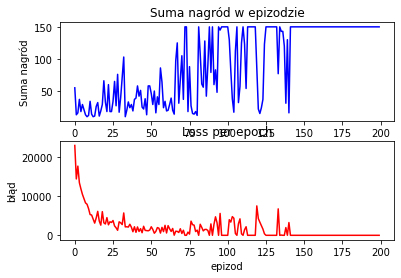

In [15]:
plt.subplot(211)
plt.ylabel('Suma nagród')  
plt.title('Suma nagród w epizodzie')
plt.plot(list(range(train_episodes)),Rewards,"b")

plt.subplot(212)
plt.xlabel('epizod')
plt.ylabel('błąd')  
plt.title('Loss per epoch')
plt.plot(list(range(train_episodes)),Loss,"r")

plt.show()